In [3]:
import random as rd 
import matplotlib.pyplot as plt
service_radius=5000
number_of_customers=100

def setup ():
    plt.rcParams["figure.figsize"] = (6,6)
    x=[0] #put deport (start point) at the middle of service area
    y=[0]   
    for i in range (1,number_of_customers+1):
        x.append(int(rd.uniform(-service_radius,service_radius)))
        y.append(int(rd.uniform(-service_radius,service_radius)))
    return(x,y)

def show (x,y):
    plt.scatter(x[0],y[0], s=100, c='r')     
    for i in range (1,number_of_customers+1):
        plt.scatter(x[i],y[i], s=50, c='b')
        #plt.text(x[i],y[i], i,va='bottom')
        
def visualize (route):
    show (x,y)
    for i in range (len(route)-1):
        plt.plot([x[route[i]],x[route[i+1]]],[y[route[i]],y[route[i+1]]],"Gray")         
    plt.show()
    
def objective(route):
    total_distance=0
    for i in range(len(route)-1):
        total_distance+=abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]])
    return(total_distance)

def greedy():
    result=[0,0]
    for i in range (1,number_of_customers+1):
        min_cost=999999999
        for j in range(1,len(result)):
            temp=result.copy()
            temp.insert(j,i)
            if objective(temp)<min_cost:
                min_cost=objective(temp)
                best_location=j
        # print(result)
        # visualize (result)
        result.insert(best_location,i)
    return(result)

def three_opt_swap(route,x,y):
    best_distance = objective(route)
    improvement = 1
    while improvement:
        improvement = 0
        for i in range(1, len(route) - 2):
            for j in range(i + 2, len(route) - 1):
                for k in range(j + 2, len(route) - 2):
                    if k+1 >= len(route):
                        continue
                    # print(route,"distance:", objective(route))
                    # print("cut:", route[i],route[i+1], "and" ,route[j],route[j+1], "and", route[k],route[k+1] )
                    new_routes = [
                        route[:i+1] + route[j:j+1] + route[i+1:i+2] + route[i+2:j][::-1] + route[k:k+1] + route[j+2:k][::-1] + route[j+1:j+2]+route[k+1:],  # case 1
                        route[:i+1] + route[j+1:j+2] + route[j+2:k] + route[k:k+1] + route[i+1:i+2] + route[i+2:j] + route[j:j+1]+route[k+1:],  # case 2
                        route[:i+1] + route[k:k+1] + route[j+2:k][::-1] + route[j+1:j+2] + route[i+1:i+2] + route[i+2:j] + route[j:j+1]+route[k+1:],  # case 3
                        route[:i+1] + route[j+1:j+2]+route[j+2:k]+route[k:k+1] + route[j:j+1] + route[i+2:j][::-1] + route[i+1:i+2]+ route[k+1:],  # case 4
                        ]
                    # print(new_routes)
                    for new_route in new_routes:
                        new_distance = objective(new_route)
                        if new_distance < best_distance:
                            route = new_route
                            best_distance = new_distance
                            improvement = 1
                            break
            
    return route


Initial route: [0, 82, 50, 33, 61, 35, 85, 18, 71, 38, 13, 80, 70, 95, 2, 89, 83, 98, 81, 3, 42, 34, 96, 8, 43, 100, 59, 49, 55, 75, 64, 22, 84, 78, 4, 54, 86, 92, 19, 99, 30, 26, 6, 58, 46, 32, 45, 97, 31, 20, 12, 40, 48, 15, 9, 41, 66, 10, 39, 74, 44, 1, 60, 91, 37, 51, 76, 28, 16, 23, 90, 62, 72, 25, 88, 17, 7, 11, 52, 56, 69, 24, 29, 73, 68, 53, 65, 36, 63, 94, 87, 27, 67, 21, 57, 77, 79, 14, 93, 47, 5, 0] with distance: 109590


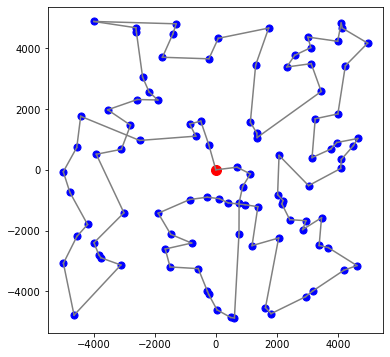

Local search result: [0, 82, 50, 33, 34, 35, 8, 43, 4, 54, 78, 84, 22, 64, 75, 55, 49, 59, 100, 85, 18, 71, 38, 13, 80, 70, 95, 2, 89, 83, 73, 36, 65, 53, 68, 63, 94, 87, 27, 67, 21, 57, 77, 56, 29, 24, 79, 69, 52, 11, 7, 17, 88, 25, 72, 62, 90, 23, 16, 28, 51, 76, 74, 39, 10, 66, 41, 9, 15, 48, 40, 44, 1, 20, 12, 32, 46, 45, 97, 58, 6, 26, 31, 30, 99, 19, 92, 86, 96, 61, 42, 3, 81, 98, 14, 93, 47, 37, 91, 60, 5, 0] with distance: 99922


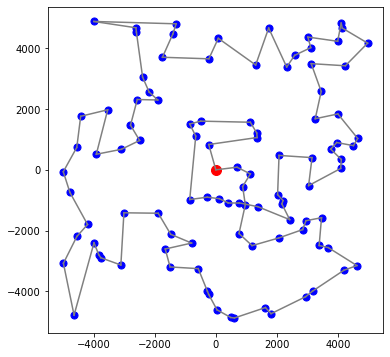

In [5]:
# Test with either a random initial_route or greedy algorithm route
# Use random seed to fix the problem generated
rd.seed(0) 
number_of_customers=100
x,y=setup()

#Choose either a random initial_route or greedy algorithm route by "#"
# initial_route=[0]+[x for x in range(1,number_of_customers+1)]+[0]
initial_route=greedy()

print("Initial route:",initial_route,"with distance:" , objective(initial_route))
visualize (initial_route)

result=three_opt_swap(initial_route,x,y)
print("Local search result:",result,"with distance:" , objective(result))
visualize (result)